# Урок 8

# Сингулярное разложение матриц

## Практическое задание

1. Найти с помощью NumPy SVD для матрицы

$$\begin{pmatrix}
1 & 2 & 0\\ 
0 & 0 & 5\\ 
3 & -4 & 2\\ 
1 & 6 & 5\\ 
0 & 1 & 0
\end{pmatrix}.$$


2. Для матрицы из предыдущего задания найти с помощью NumPy и вручную:

    а) евклидову норму;
    
    б) норму Фробениуса.
    
3. Разобраться с ирисами - алгоритмом использования SVD для нахождения явных признаков (понизить количество признаков с 4 до 1 для каждого сорта и тестовой выборке проверить это)

__Решение__
__1.__

In [826]:
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [827]:
A = np.array([[1,2,0],
              [0,0, 5],
              [3,-4,2],
              [1,6,5],
             [0,1,0]])
print(f'Матрица A:\n{A}')

Матрица A:
[[ 1  2  0]
 [ 0  0  5]
 [ 3 -4  2]
 [ 1  6  5]
 [ 0  1  0]]


In [828]:
U, s, W = np.linalg.svd(A)

# Транспонируем матрицу W
V = W.T

# s - список диагональных элементов, его нужно привести к виду диагональной матрицы для наглядности
Sigma = np.zeros_like(A, dtype=float)
Sigma[np.diag_indices(min(A.shape))] = s

In [829]:
print(f'Матрица U:\n{U}')
print(f'Матрица Sigma:\n{Sigma}')
print(f'Матрица V:\n{V}')

Матрица U:
[[ 0.17  0.16 -0.53 -0.8  -0.16]
 [ 0.39 -0.53  0.61 -0.43  0.03]
 [-0.14 -0.82 -0.52  0.14  0.07]
 [ 0.89  0.06 -0.25  0.38 -0.06]
 [ 0.08  0.11 -0.08 -0.11  0.98]]
Матрица Sigma:
[[8.82 0.   0.  ]
 [0.   6.14 0.  ]
 [0.   0.   2.53]
 [0.   0.   0.  ]
 [0.   0.   0.  ]]
Матрица V:
[[ 0.07 -0.37 -0.93]
 [ 0.72  0.67 -0.21]
 [ 0.69 -0.65  0.31]]


__Решение__ 

__2.а)__

Евклидова норма матрицы характеризует ее значимость при умножении матрицы на вектор. Так как в задании нет вектора, то видимо подразумевается нахождение евклидовом нормы исходной для матрицы А, а нормы Фробениуса когда уже известна/с использованием диагональной матрицы, потому что вроде как формулы для нормы Фробениуса и Евклидовой одинаковы: 


$$\left \| A \right \|=\sqrt{\sum_{i=1}^{m}\sum_{j=1}^{n}a_{ij}^{2}}.$$

$\left \| A \right \|_E = \sqrt{1+4+25+9+16+4+1+36+25+1}= \sqrt{122}=11.045$

http://mathworld.wolfram.com/FrobeniusNorm.html  


https://ru.wikipedia.org/wiki/Норма_матрицы

In [830]:
(122)**(1/2)

11.045361017187261

In [831]:
np.linalg.norm(A,ord=None)

11.045361017187261

нормирование матрицы Sigma для определения влияния ранга на апроксимацию к матрице А в случае уменьшения размерности(ранга)


$r_1=\frac{8.82}{11.045}=0.7985$  

$r_2=\frac{6.14}{11.045}=0.5559$  

$r_3=\frac{2.53}{11.045}=0.2290$ 

__2.б)__

В случае, когда известно сингулярное разложение матрицы, ее норма Фробениуса вычисляется как

$$\left \| A \right \|_{F}=\sqrt{\sum_{k=1}^{r}\mu_{k}^{2}}.$$

$\left \| A \right \|_{F}=\sqrt{8.82^2+6.14^2+2.53^2}=\sqrt{121.8929}=11.0405$

In [763]:
(8.82**2+6.14**2+2.53**2)**(1/2)

11.04051176350082

In [764]:
np.linalg.norm(A,ord='fro')

11.045361017187261

формально в numpy вычисляется по умолчанию и с указанием только норма Фробениуса: np.linalg.norm(A,ord=None) = np.linalg.norm(A,ord='fro')

похоже я не понял задание ?

на всякий случай расчет нормы "вручную":

In [832]:
A = np.array([[1,2,0],
              [0,0, 5],
              [3,-4,2],
              [1,6,5],
             [0,1,0]])
A_f=0
for i in range(len(A)):
    for j in range(len(A[0])):
        A_f += A[i][j]**2
        
A_norma=A_f**0.5
print(f'норма матрицы А: {A_norma:0.3f}')

норма матрицы А: 11.045


нормирование матрицы

In [833]:
A = np.array([[1,2,0],
              [0,0, 5],
              [3,-4,2],
              [1,6,5],
             [0,1,0]])
print(f'норма матрицы А: {A_norma:0.3f}')
r= np.zeros_like(A, dtype=float)
for i in range(len(A)):
    for j in range(len(A[0])):
        r[i][j] = A[i][j]/A_norma
print(r)

норма матрицы А: 11.045
[[ 0.09  0.18  0.  ]
 [ 0.    0.    0.45]
 [ 0.27 -0.36  0.18]
 [ 0.09  0.54  0.45]
 [ 0.    0.09  0.  ]]


__3.Разобраться с ирисами__

задача - уменьшить количество признаков используя SVD

In [835]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from pandas import DataFrame
from sklearn import linear_model
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [836]:
# загрузка набор данных Ирисы:
iris = datasets.load_iris()
# названия переменных
print(iris.feature_names)
# данные
print(iris.data[:5])
# целевая переменная
print(iris.target_names)
print(iris.target)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [837]:
# Для удобства манипулирования данными делаем из них DataFrame:
iris_frame = DataFrame(iris.data)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:

samples,features = shape(iris_frame.iloc[:,:5])
iris_frame[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


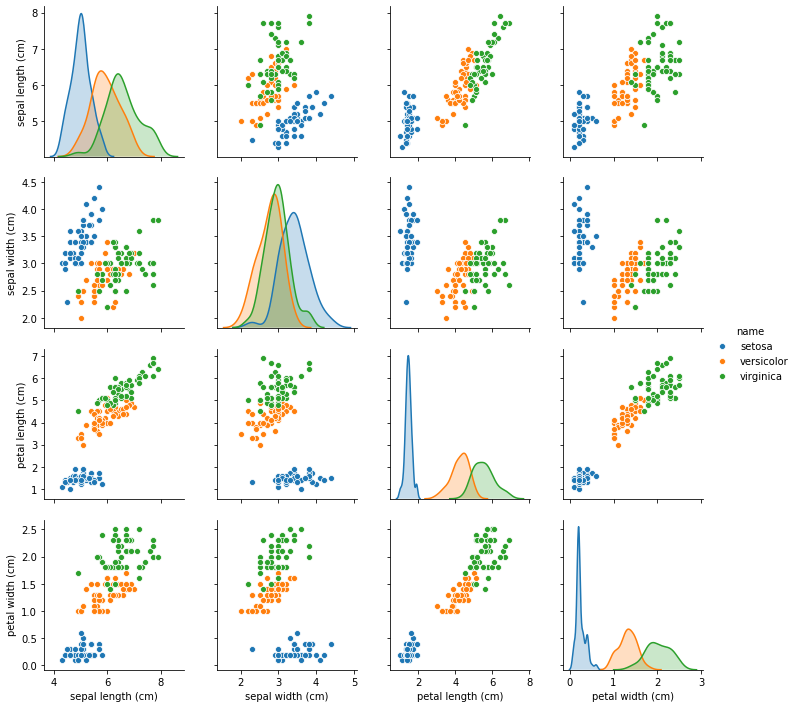

In [838]:
import seaborn as sns

sns.pairplot(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

изобразим на графики группы ирисов по 2 более других признаков характеризующие отличия между 3 группами признаков

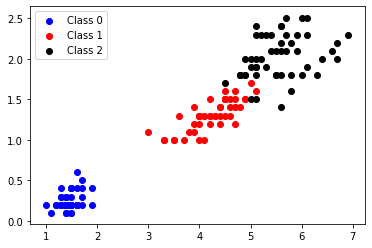

In [839]:
fig, ax = plt.subplots()
colors = ['blue','red','black']
for i in range(len(colors)):
    ax.scatter(iris_frame[iris_frame.target==i]["petal length (cm)"], iris_frame[iris_frame.target==i]["petal width (cm)"], color=colors[i], label=f'Class {i}')
    
plt.legend(loc='upper left')

Создадим матрицу по 4 признакам для уменьшения их до 2 с помощью SVD

но сперва нормализуем

In [887]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(iris_frame.iloc[:,:4]) 
scaled_values[0:5]

array([[0.22, 0.62, 0.07, 0.04],
       [0.17, 0.42, 0.07, 0.04],
       [0.11, 0.5 , 0.05, 0.04],
       [0.08, 0.46, 0.08, 0.04],
       [0.19, 0.67, 0.07, 0.04]])

In [959]:
A = scaled_values
A[0:5]

array([[0.22, 0.62, 0.07, 0.04],
       [0.17, 0.42, 0.07, 0.04],
       [0.11, 0.5 , 0.05, 0.04],
       [0.08, 0.46, 0.08, 0.04],
       [0.19, 0.67, 0.07, 0.04]])

In [960]:
U, s, W = np.linalg.svd(A)

In [961]:
# Транспонируем матрицу W
VT = W.T

# s - список диагональных элементов, его нужно привести к виду диагональной матрицы для наглядности
Sigma = np.zeros_like(A, dtype=float)
Sigma[np.diag_indices(min(A.shape))] = s

In [962]:
print(f'Матрица U размер:{shape(U)} :\n{U}')
print(f'Матрица Sigma размер:{shape(Sigma)} :\n{Sigma}')
print(f'Матрица VT размер:{shape(VT)} :\n{VT}')

Матрица U размер:(150, 150) :
[[-0.03  0.14 -0.01 ... -0.1  -0.08 -0.07]
 [-0.03  0.09 -0.02 ...  0.02 -0.03  0.01]
 [-0.02  0.11  0.04 ... -0.02 -0.14 -0.14]
 ...
 [-0.11 -0.03  0.03 ...  0.98 -0.02 -0.01]
 [-0.12 -0.    0.17 ... -0.02  0.95 -0.02]
 [-0.1  -0.02  0.1  ... -0.01 -0.02  0.98]]
Матрица Sigma размер:(150, 4) :
[[12.06  0.    0.    0.  ]
 [ 0.    3.85  0.    0.  ]
 [ 0.    0.    1.23  0.  ]
 [ 0.    0.    0.    0.6 ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]

$$\left \|\Sigma \right \|=\sqrt{\sum_{i=1}^{m}\sum_{j=1}^{n}\sigma_{ij}^{2}}.$$

$\left \| \Sigma \right \|_F = \sqrt{12.06^2+3.85^2+1.23^2+0.6^2}= \sqrt{163.086}=12.77$

$r_1=\frac{12.06}{12.77}=0.9443$


$r_2=\frac{3.85}{12.77}=0.30147$


$r_3=\frac{1.23}{12.77}=0.0963$


$r_4=\frac{0.6}{12.77}=0.0469$

уменьшим количество признаков до 2 (ранг2)

Уменьшим размерность до 2 признаков 

__Способ 1 - "как в интернете"__

In [894]:
newdata = U[:,:2]
newdata[:5]

array([[-0.03,  0.14],
       [-0.03,  0.09],
       [-0.02,  0.11],
       [-0.02,  0.1 ],
       [-0.03,  0.15]])

Сделаем категоризацию по новым признакам

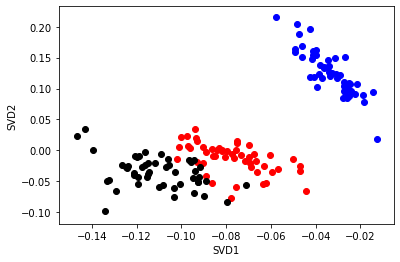

In [895]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
colors = ['blue','red','black']
for i in range(samples):
    ax.scatter(newdata[i,0],newdata[i,1], color=colors[int(iris_frame.iloc[i,-2])])
plt.xlabel('SVD1')
plt.ylabel('SVD2')
plt.show()

Проведем классификацию испльзуя метод k-means

In [896]:
train_data, test_data, train_labels, test_labels = train_test_split(
    newdata, iris_frame['target'], test_size = 0.3,random_state = 0)
print (train_data)
print (test_data)
print (train_labels)
print (test_labels)

[[-0.04 -0.07]
 [-0.11 -0.02]
 [-0.13 -0.02]
 [-0.08 -0.08]
 [-0.1  -0.08]
 [-0.06 -0.03]
 [-0.13 -0.05]
 [-0.1   0.02]
 [-0.06 -0.03]
 [-0.09 -0.05]
 [-0.09 -0.03]
 [-0.07 -0.06]
 [-0.09 -0.07]
 [-0.1   0.02]
 [-0.11 -0.03]
 [-0.09  0.03]
 [-0.03  0.09]
 [-0.09 -0.05]
 [-0.07 -0.02]
 [-0.07  0.01]
 [-0.07 -0.03]
 [-0.09  0.  ]
 [-0.12 -0.01]
 [-0.04  0.15]
 [-0.01  0.1 ]
 [-0.1  -0.05]
 [-0.08  0.01]
 [-0.04  0.12]
 [-0.06  0.22]
 [-0.1   0.01]
 [-0.02  0.1 ]
 [-0.1  -0.02]
 [-0.05 -0.01]
 [-0.03  0.12]
 [-0.08 -0.08]
 [-0.14  0.  ]
 [-0.08  0.  ]
 [-0.02  0.09]
 [-0.12 -0.04]
 [-0.12 -0.03]
 [-0.12 -0.04]
 [-0.11 -0.06]
 [-0.04  0.16]
 [-0.03  0.12]
 [-0.11 -0.01]
 [-0.12 -0.01]
 [-0.01  0.02]
 [-0.12 -0.  ]
 [-0.03  0.09]
 [-0.09 -0.07]
 [-0.12 -0.02]
 [-0.02  0.11]
 [-0.03  0.15]
 [-0.11 -0.02]
 [-0.04  0.13]
 [-0.02  0.09]
 [-0.05  0.16]
 [-0.06 -0.05]
 [-0.12 -0.03]
 [-0.13 -0.05]
 [-0.03  0.14]
 [-0.03  0.1 ]
 [-0.03  0.13]
 [-0.08 -0.01]
 [-0.09  0.01]
 [-0.03  0.11]
 [-0.04  0

In [907]:
model = KMeans(n_clusters=3)
model.fit(train_data)
model_predictions = model.predict(test_data)
print(metrics.accuracy_score(test_labels, model_predictions))
print(metrics.classification_report(test_labels, model_predictions))

0.9111111111111111
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.89      0.89      0.89        18
           2       0.82      0.82      0.82        11

    accuracy                           0.91        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.91      0.91      0.91        45



сравним с первоначальной матрицей данных:

In [915]:
train_data, test_data, train_labels, test_labels = train_test_split(
    iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']],
    iris_frame[['target']], test_size = 0.3,random_state = 0)
model = KMeans(n_clusters=3)
model.fit(train_data)
model_predictions = model.predict(test_data)
print(metrics.accuracy_score(test_labels, model_predictions))
print(metrics.classification_report(test_labels, model_predictions))

0.9111111111111111
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.82      1.00      0.90        18
           2       1.00      0.64      0.78        11

    accuracy                           0.91        45
   macro avg       0.94      0.88      0.89        45
weighted avg       0.93      0.91      0.91        45



k-mean не стабильный метод - сильно зависит от первоначально выбранных точках, есть идея увеличить предсказание на тесте использовав метод классификации Stochastic Gradient Descent и оставив одну переменную

In [916]:
newdata_2 = U[:,:1]
newdata_2[:5]

array([[-0.03],
       [-0.03],
       [-0.02],
       [-0.02],
       [-0.03]])

In [945]:
train_data, test_data, train_labels, test_labels = train_test_split(
    newdata_2, iris_frame['target'], test_size = 0.3)

#print train_data
#print test_data[:2] 
#print train_labels
#print test_labels[:2] 

clf = linear_model.SGDClassifier(alpha=0.0009, max_iter=1000, random_state = 42)
clf.fit(train_data, train_labels)

clf_predictions = clf.predict(test_data)

print(metrics.accuracy_score(test_labels, clf_predictions))
print(metrics.classification_report(test_labels, clf_predictions))

0.7777777777777778
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       0.00      0.00      0.00        10
           2       0.61      1.00      0.76        14

    accuracy                           0.78        45
   macro avg       0.52      0.67      0.58        45
weighted avg       0.63      0.78      0.69        45



/Users/ksndr/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


__Способ-2 - как в 5 уроке__

In [1030]:
A = iris_frame.iloc[:,:4]
A

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [1031]:
U, s, W = np.linalg.svd(A)

In [1032]:
# Транспонируем матрицу W
VT = W.T

# s - список диагональных элементов, его нужно привести к виду диагональной матрицы для наглядности
Sigma = np.zeros_like(A, dtype=float)
Sigma[np.diag_indices(min(A.shape))] = s

In [1033]:
print(f'Матрица U размер:{shape(U)} :\n{U}')
print(f'Матрица Sigma размер:{shape(Sigma)} :\n{Sigma}')
print(f'Матрица VT размер:{shape(VT)} :\n{VT}')

Матрица U размер:(150, 150) :
[[-0.06  0.13  0.   ... -0.09 -0.1  -0.08]
 [-0.06  0.11  0.07 ...  0.04 -0.03  0.01]
 [-0.06  0.12  0.   ...  0.03  0.2   0.14]
 ...
 [-0.09 -0.05 -0.04 ...  0.98 -0.02 -0.01]
 [-0.09 -0.06 -0.21 ... -0.02  0.94 -0.03]
 [-0.09 -0.05 -0.1  ... -0.01 -0.03  0.97]]
Матрица Sigma размер:(150, 4) :
[[95.96  0.    0.    0.  ]
 [ 0.   17.76  0.    0.  ]
 [ 0.    0.    3.46  0.  ]
 [ 0.    0.    0.    1.88]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]

оценка влияния ранга на результат - нормирование матрицы D:

норма Фробениуса:

$$\left \|\Sigma \right \|=\sqrt{\sum_{i=1}^{m}\sum_{j=1}^{n}\sigma_{ij}^{2}}.$$

$\left \| \Sigma \right \|_F = \sqrt{95.96^2+17.76^2+3.46^2+1.88^2}= \sqrt{9539.2452}=97.669$

$r_1=\frac{95.96}{97.669}=0.9825$


$r_2=\frac{17.76}{97.669}=0.1818$


$r_3=\frac{3.46}{97.669}=0.0354$


$r_4=\frac{1.88}{97.669}=0.0192$

уменьшим количество признаков до 2 (ранг2)

In [1034]:
n_elements = 2
Sigma = Sigma[:, :n_elements]
VT = VT[:,:n_elements]
# reconstruct
B = U.dot(Sigma.dot(VT.T))
print(shape(Sigma))
print(shape(W))
print(shape(U))
print(A)
print(B)


(150, 2)
(4, 4)
(150, 150)
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
[[5.1  3.51 1

In [1037]:
# # transform
# T = U.dot(Sigma)
# print(T)
# T = A.dot(VT)
# print(T)

Полученная матрица $B$ типо и есть матрица в которой что? уменьшено количество признаков влияющих на категоризацию? но цифорок меньше не стало...?
ладно проверим - может на графиках будет что то заметно:

In [1040]:
# Для удобства манипулирования данными делаем из них DataFrame:
iris_frame = DataFrame(B)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:

samples,features = shape(iris_frame.iloc[:,:5])
iris_frame[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.095293,3.505977,1.401922,0.201653,0,setosa
1,4.745880,3.196109,1.461370,0.258003,0,setosa
2,4.686674,3.215863,1.309549,0.194527,0,setosa
3,4.614885,3.088944,1.463479,0.270027,0,setosa
4,5.074887,3.506231,1.364281,0.186400,0,setosa


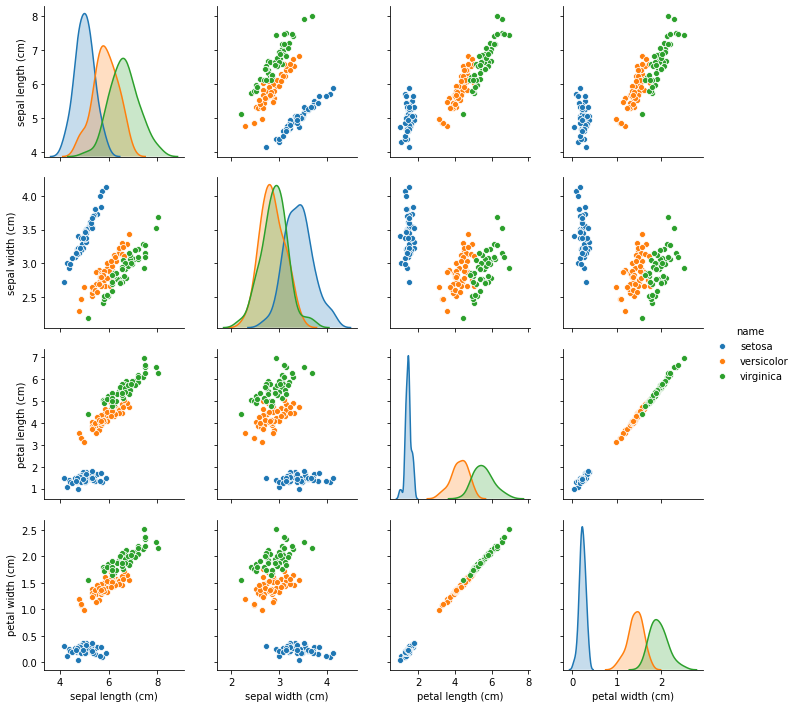

In [1041]:
sns.pairplot(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

    ...эээ ну типа два признака которые и так более менее коррелировались превратились в линию
    
 попробуюем сделать корреляционную матрицу и сообственный вектор (1:19:25)

In [1057]:
B_corr = np.corrcoef(B)
print(shape(B_corr))
print(B_corr)

(150, 150)
[[1.   1.   1.   ... 0.65 0.63 0.63]
 [1.   1.   1.   ... 0.68 0.66 0.66]
 [1.   1.   1.   ... 0.65 0.63 0.64]
 ...
 [0.65 0.68 0.65 ... 1.   1.   1.  ]
 [0.63 0.66 0.63 ... 1.   1.   1.  ]
 [0.63 0.66 0.64 ... 1.   1.   1.  ]]


In [1059]:
w, v = np.linalg.eig(B_corr)

print(f'Матрица B_corr:\n{B_corr}')
print(f'Собственные значения:\n{w}')
print(f'Собственные векторы:\n{v}')

Матрица B_corr:
[[1.   1.   1.   ... 0.65 0.63 0.63]
 [1.   1.   1.   ... 0.68 0.66 0.66]
 [1.   1.   1.   ... 0.65 0.63 0.64]
 ...
 [0.65 0.68 0.65 ... 1.   1.   1.  ]
 [0.63 0.66 0.63 ... 1.   1.   1.  ]
 [0.63 0.66 0.64 ... 1.   1.   1.  ]]
Собственные значения:
[129.08+0.j  20.92+0.j   0.  +0.j   0.  -0.j  -0.  +0.j  -0.  +0.j
  -0.  +0.j  -0.  -0.j   0.  +0.j   0.  -0.j   0.  +0.j   0.  +0.j
   0.  -0.j   0.  +0.j   0.  -0.j   0.  +0.j   0.  -0.j  -0.  +0.j
  -0.  -0.j   0.  +0.j   0.  -0.j  -0.  +0.j  -0.  -0.j  -0.  +0.j
  -0.  -0.j  -0.  +0.j  -0.  +0.j  -0.  -0.j   0.  +0.j   0.  -0.j
   0.  +0.j   0.  -0.j   0.  +0.j   0.  -0.j  -0.  +0.j  -0.  -0.j
  -0.  +0.j  -0.  +0.j  -0.  -0.j  -0.  +0.j  -0.  -0.j   0.  +0.j
   0.  -0.j   0.  +0.j   0.  -0.j  -0.  +0.j  -0.  -0.j  -0.  +0.j
  -0.  -0.j   0.  +0.j   0.  -0.j   0.  +0.j   0.  -0.j   0.  +0.j
   0.  -0.j   0.  +0.j   0.  +0.j   0.  +0.j   0.  -0.j   0.  +0.j
   0.  -0.j  -0.  +0.j  -0.  -0.j  -0.  +0.j  -0.  -0.j  -0.  +0

как это вообще то использовать это? 150 на 150 ??


Попробуем транспонировать массив
https://pyprog.pro/statistics_functions/corrcoef.html

In [1062]:
B_corr_2 = np.corrcoef(B, rowvar = False)
print(shape(B_corr_2))
print(B_corr_2)

(4, 4)
[[ 1.   -0.07  0.88  0.86]
 [-0.07  1.   -0.53 -0.57]
 [ 0.88 -0.53  1.    1.  ]
 [ 0.86 -0.57  1.    1.  ]]


In [1064]:
w, v = np.linalg.eig(B_corr_2)

print(f'Матрица B_corr_2:\n{B_corr_2}')
print(f'Собственные значения:\n{w}')
print(f'Собственные векторы:\n{v}')

Матрица B_corr_2:
[[ 1.   -0.07  0.88  0.86]
 [-0.07  1.   -0.53 -0.57]
 [ 0.88 -0.53  1.    1.  ]
 [ 0.86 -0.57  1.    1.  ]]
Собственные значения:
[ 3.06 -0.    0.94  0.  ]
Собственные векторы:
[[-0.49  0.7  -0.52 -0.05]
 [ 0.32 -0.41 -0.85  0.07]
 [-0.57 -0.43 -0.04 -0.66]
 [-0.57 -0.4   0.01  0.75]]


    Вроде по легче (то что не 150 векторов,а 4, хотя и 4 многовато), но как использовать это в контексте задачи? подскажите пожалуста - я запутался